**Partie 2 — Application de la Régression**

Exercice 1

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

Charger les données dans une variable nommée tab. 

In [3]:

tab = pd.read_table("DataHeight.txt")
tab

,index,age,height
0,1,2.065875,0.779189
1,2,2.368409,0.915968
2,3,2.539993,0.905384
3,4,2.542080,0.905661
4,5,2.549079,0.938989
5,6,2.786688,0.966847
6,7,2.911682,0.964368
7,8,3.035627,0.914459
8,9,3.114670,0.939339
9,10,3.158239,0.960750


Charger le vecteur age dans une variable nommée x

In [4]:
x = tab['age']


Charger le vecteur height dans une variable nommée y. 

In [5]:
y = tab['height']

Donner la distribution de y en fonction de x

Text(0, 0.5, 'Taille')

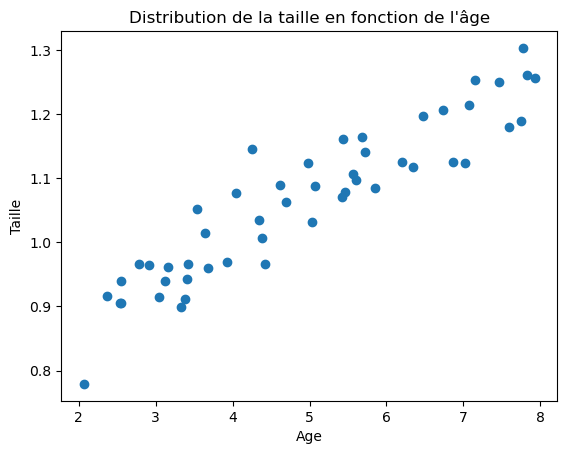

In [6]:

plt.scatter(x, y)
plt.title("Distribution de la taille en fonction de l'âge")
plt.xlabel("Age")
plt.ylabel("Taille")

Peut-on  dire  qu’il  y  a  une  corrélation  entre  les  deux variables ??

Oui, on peut dire qu'il y a une corrélation entre les deux variables parceque la tendance générale des données montre une augmentation de la taille avec l'âge

Prouvez  d’une  manière  statistique  (rigoureuse)  que  x  et  y  sont  soit  corrélées  soit 
non ?

In [7]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(x, y)

print("p-value:", p_value)
print("Coefficient de corrélation linéaire : =", corr)

if p_value > 0.05:
    print("x  et  y  sont  non  corrélées  ")
else:
    print("x  et  y  sont   corrélées  ")


p-value: 5.509991039042763e-22
Coefficient de corrélation linéaire : = 0.9263170211762402
x  et  y  sont   corrélées  


Quelles sont les valeurs des paramètres (q0 et q1)

In [8]:
from scipy.stats import linregress
q1, q0, _ , _, _= linregress(x, y)
print(f"Les valeurs des paramètres sont q0 = {q0} et q1 = {q1}")

Les valeurs des paramètres sont q0 = 0.7501625370012386 et q1 = 0.0638811658258342


Quelle est la valeur de l’erreur résiduelle.

In [9]:
eroor = y - (q0 + q1 * x)
erresi = np.mean(eroor**2)*0.5
erresi

0.000987069973276125

Donnez l’équation de la droite de régression.

In [10]:
print ("y = ",q0,"+" ,q1, "x")

y =  0.7501625370012386 + 0.0638811658258342 x


Dessiner la droite de régression

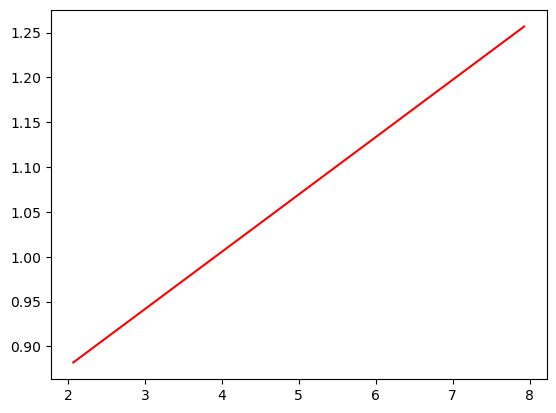

In [11]:
plt.plot(x, q0 + q1 * x, color='red')
plt.show()

Selon le modèle trouvé prédire les poids de 4 enfants ayant respectivement 3, 7, 9 et 12 ans

In [12]:
ages = [3, 7, 9, 12]
predicted_heights = q0 + q1 * np.array(ages)
for lll in ages:
    print("le poid d' un enfant ",lll," ans est ",q0 + q1*lll)

le poid d' un enfant  3  ans est  0.9418060344787411
le poid d' un enfant  7  ans est  1.197330697782078
le poid d' un enfant  9  ans est  1.3250930294337464
le poid d' un enfant  12  ans est  1.516736526911249


Exercice 3 :

1. Afficher les informations

In [13]:
import pandas as pd


boston = pd.read_csv('housing.data', sep='\s+', header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


2. Afficher le type de chaque donnée.

In [14]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

3. Que pouvez-vous dire de ces données.

La base de données Boston contient des informations sur les valeurs des maisons dans les banlieues de Boston, aux États-Unis. Elle comporte 506 échantillons et 14 variables. Les noms et descriptions des variables sont les suivants :

- crim : taux de criminalité par habitant
- zn : proportion de terrains résidentiels non commerciaux
- indus : proportion de zones industrielles non commerciales
- chas : variable fictive indiquant si la zone borde la rivière Charles
- nox : concentration d'oxyde d'azote (parties par million)
- rm : nombre moyen de pièces par habitation
- age : proportion de logements construits avant 1940
- dis : distance pondérée à cinq centres d'emploi de Boston
- rad : indice d'accessibilité aux autoroutes radiales
- tax : taux d'imposition foncière pour 10 000 dollars de valeur totale
- ptratio : ratio élèves/enseignant par ville
- black : proportion de personnes noires par ville
- lstat : pourcentage de la population de statut inférieur
- medv : valeur médiane des maisons occupées par leur propriétaire en milliers de dollars.

Ces données sont généralement utilisées pour appliquer des techniques de modélisation et de prévision afin de déterminer les facteurs qui influencent la valeur des maisons dans les zones résidentielles.

4. Diviser  les  données  en  utilisant  les  400  premières  observations  que  les  données 
d'entraînement et le reste en tant que données de test. 

In [15]:
train_boston =boston[:400]
test_boston =boston[400:]

5. Vérifier s'il existe une relation linéaire entre medv et age

In [16]:

from scipy.stats import pearsonr
age=boston.AGE
medv=boston.MEDV

corr, p_value = pearsonr(age, medv)

print("Coefficient de corrélation linéaire : =", corr)


Coefficient de corrélation linéaire : = -0.3769545650045963



Si le coefficient de corrélation linéaire est proche de 1 ou -1, cela indique une forte corrélation linéaire positive ou négative entre les variables, ce qui signifie qu'il existe une relation linéaire entre les deux variables. Dans notre cas,  corr = -0.37 est proche de 0, cela indique une faible corrélation linéaire et donc une absence de relation linéaire entre medv et age.

6. Dessiner le nuage de points de ces deux variables.

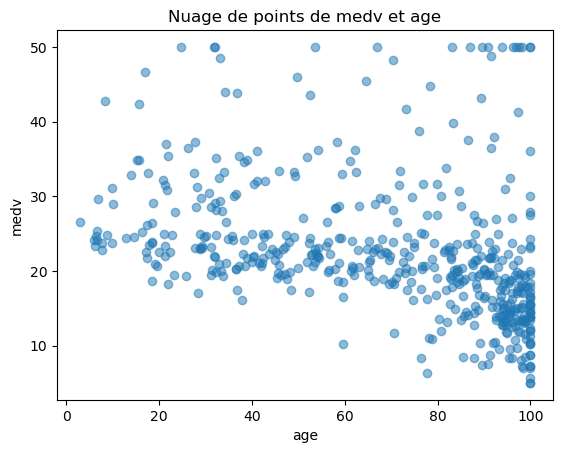

In [17]:
import matplotlib.pyplot as plt

plt.scatter(age, medv, alpha=0.5)
plt.title('Nuage de points de medv et age')
plt.xlabel('age')
plt.ylabel('medv')
plt.show()

7. Faite la même chose avec medv et lstat.

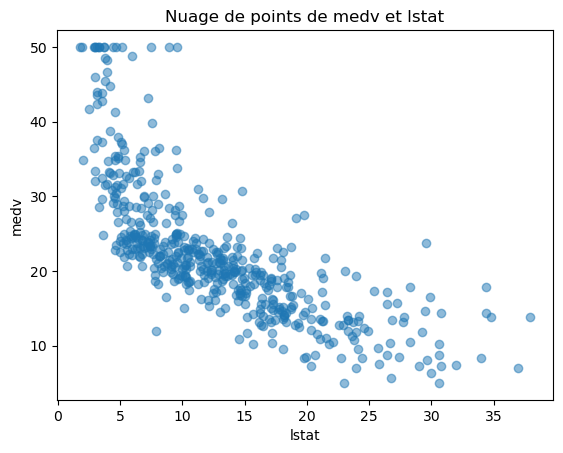

In [18]:
lstat=boston.LSTAT

plt.scatter(lstat, medv, alpha=0.5)
plt.title('Nuage de points de medv et lstat')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

8. Dessiner la droite de régression

-0.9500493537579912 X + 34.55384087938309


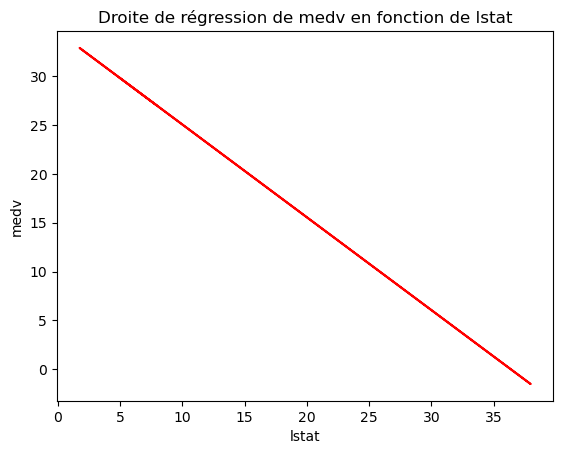

In [19]:
import numpy as np

coefficients = np.polyfit(lstat, medv, 1)
a = coefficients[0]
b = coefficients[1]
print(a,'X +',b)

plt.plot(lstat, a * lstat + b, color='red')
plt.title('Droite de régression de medv en fonction de lstat')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()


9. Vérifier statiquement et graphiquement si la variable medv peut être expliqué par un 
modèle linéaire simple par lstat.

In [20]:
corr2, p_value = pearsonr(lstat, medv)
print("Coefficient de corrélation linéaire : =", corr2)
print("p-valeur =", p_value)
if p_value > 0.05:
    print("x  et  y  sont  non  corrélées  ")
else:
    print("x  et  y  sont   corrélées  ")

Coefficient de corrélation linéaire : = -0.737662726174015
p-valeur = 5.081103394386392e-88
x  et  y  sont   corrélées  


Si le coefficient de corrélation linéaire est proche de 1 ou -1, cela indique une forte corrélation linéaire positive ou négative entre les variables, ce qui signifie qu'il existe une relation linéaire entre les deux variables. Dans notre cas,  corr2 =-0.738, ce qui indique une forte corrélation négative

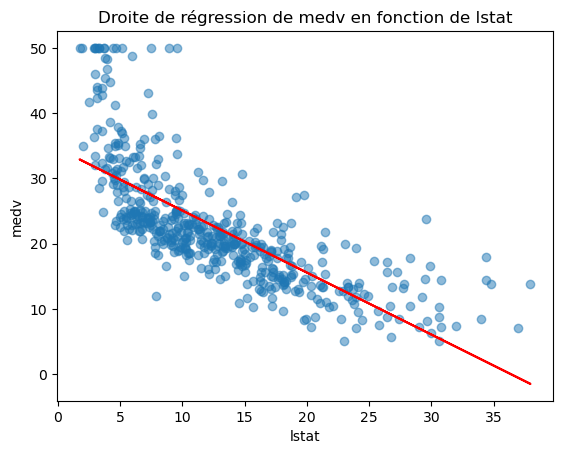

In [21]:
plt.scatter(lstat, medv, alpha=0.5)
plt.plot(lstat, a * lstat + b, color='red')
plt.title('Droite de régression de medv en fonction de lstat')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

la forte corrélation négative entre medv et lstat ainsi que la visualisation graphique confirment que la variable medv peut être expliquée par un modèle linéaire simple par lstat.

10. Que pouvez-vous déduire ?

La variable lstat peut être un prédicteur significatif de la valeur médiane des habitants propriétaires dans les logements de la banlieue de Boston.

11. Exécutez et commenter l’instruction pairs(Boston).

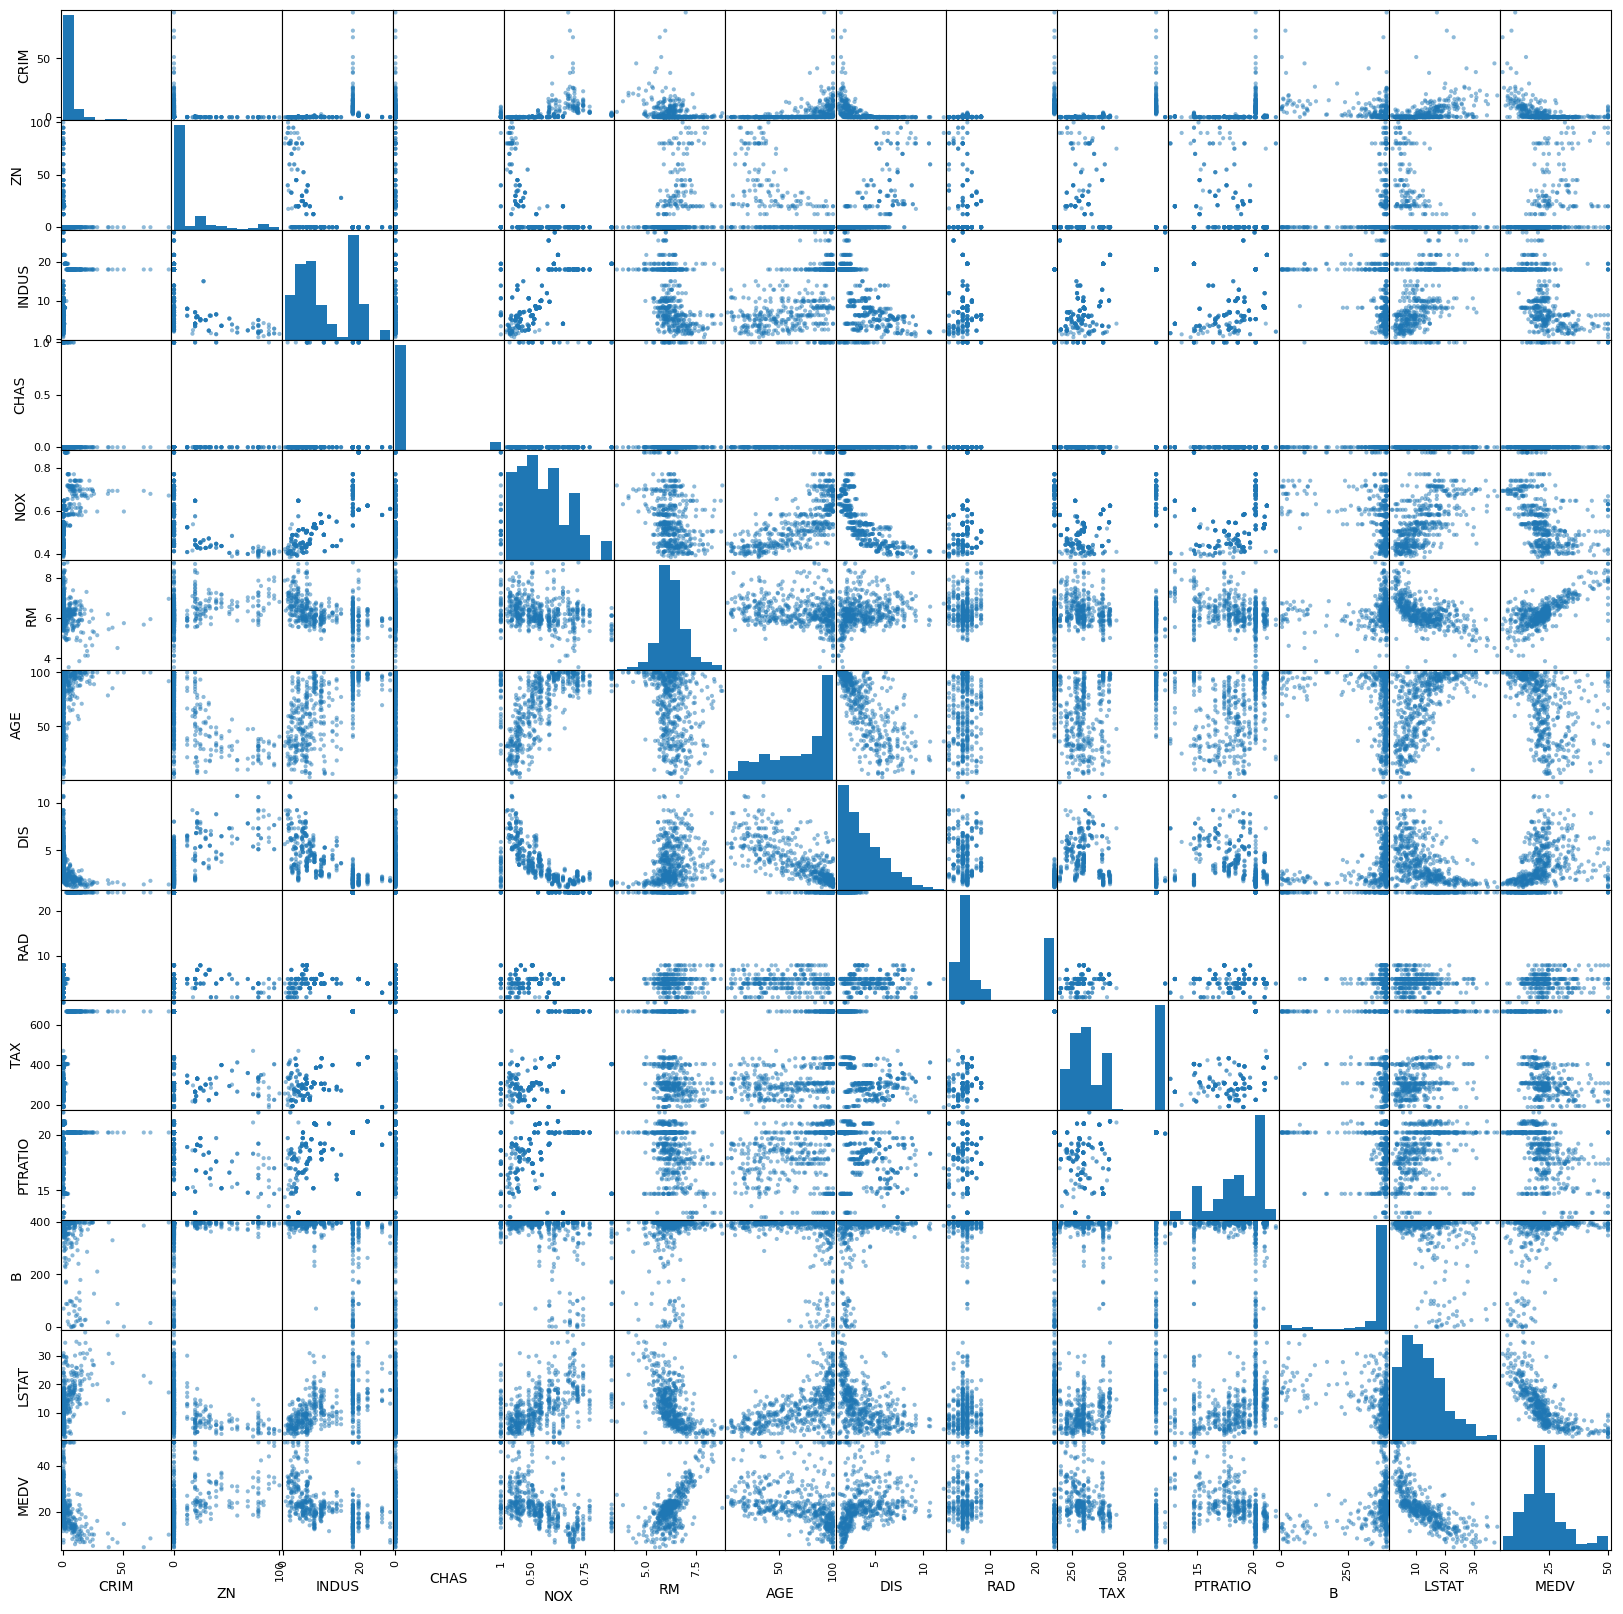

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(boston, figsize=(20, 20))
plt.show()

l'instruction pairs(Boston) permet de créer une matrice de diagrammes de dispersion pour toutes les variables de la base de données Boston, ce qui permet de visualiser les relations entre toutes les variables

12. Répéter l’instruction mais uniquement avec les première, la troisième et la septième 
variable.

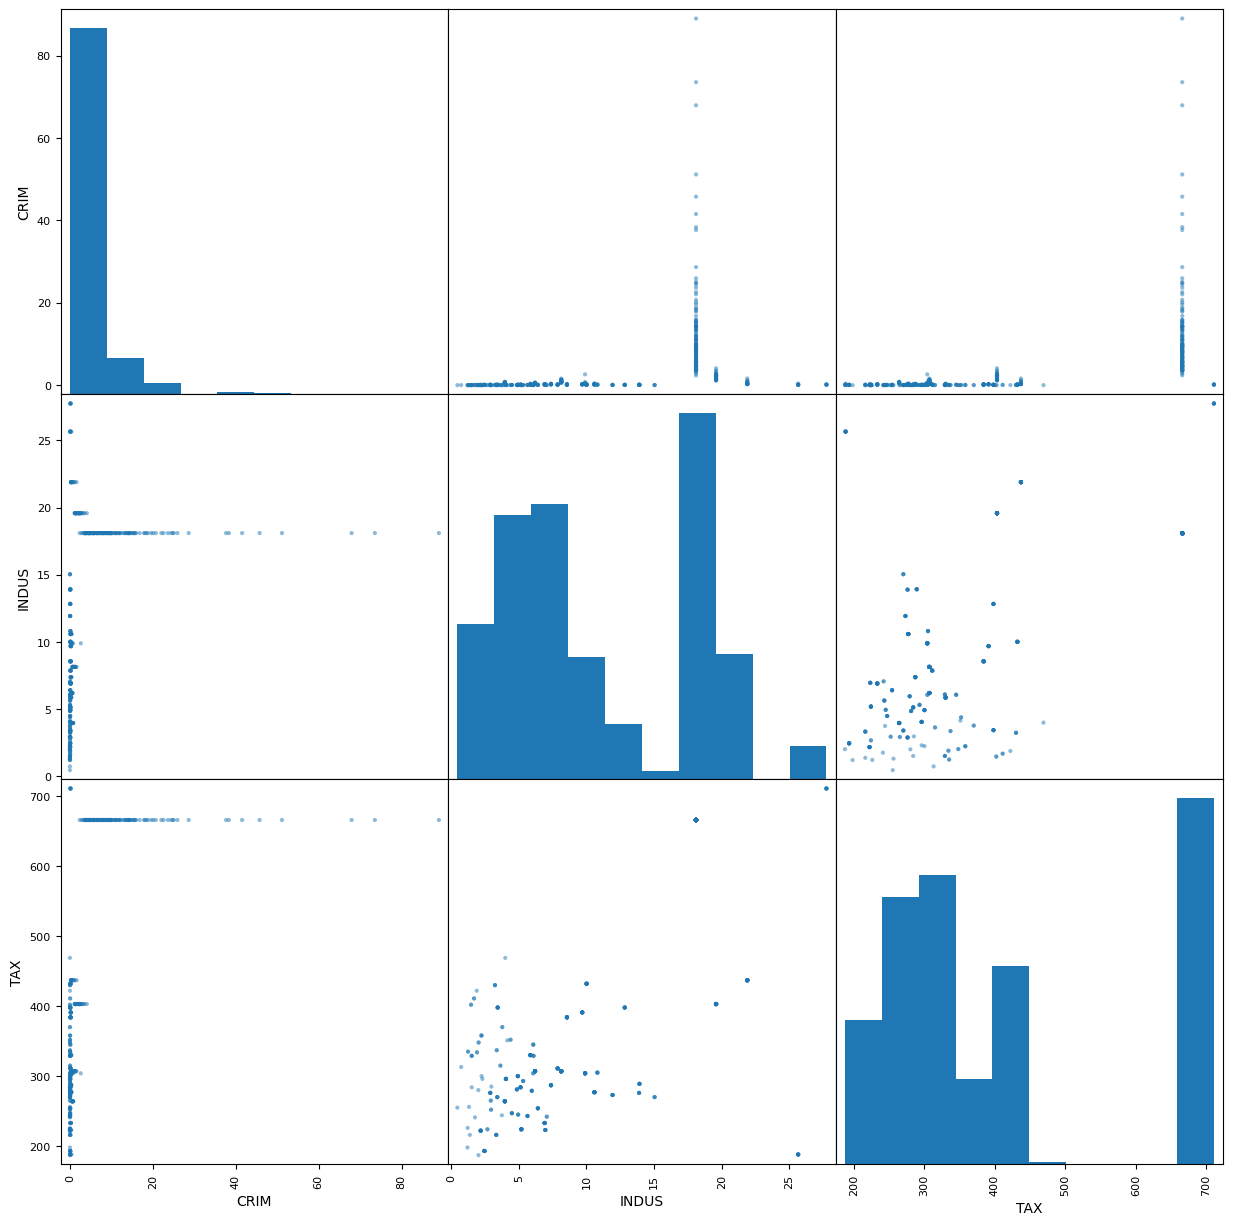

In [33]:
selected_cols = ['CRIM', 'INDUS', 'TAX']
scatter_matrix(boston[selected_cols], figsize=(15, 15))
plt.show()

13. utiliser l'ensemble de données de formation pour former le modèle linéaire multiple 
avec comme variable expliquée medv et comme variables explicatives la variable lstat 
et  la variable age. 

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression

X_train = train_boston.iloc[ : ,[5, 6]]
y_train = train_boston.MEDV

model = LinearRegression()

model.fit(X_train, y_train)

y_pred1 = model.predict(X_train)

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficients:  [ 9.09010004 -0.03411516]
Intercept:  -31.076328022531957


14. Que peut-on conclure ? Expliquez

En entraînant un modèle linéaire multiple avec medv comme variable à expliquer et lstat et age comme variables explicatives, nous avons constaté que les valeurs de medv ont tendance à diminuer lorsque les valeurs de lstat et age augmentent.  Le modèle peut être utilisé pour prédire les valeurs de medv en fonction des valeurs de lstat et d'âge.

15. utiliser l'ensemble de données de formation pour former le modèle linéaire multiple 
avec comme variable expliquée medv et comme variables explicatives le logarithme 
de la variable lstat et la variable age.

In [95]:

X_train = np.column_stack((np.log(train_boston.LSTAT), train_boston.AGE))
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
model.score(X_train, y_train)


Coefficients:  [-14.33896861   0.0777927 ]
Intercept:  51.60211584857219


0.6683998682685884

16. Que peut-on conclure ? Expliquez

Nous pouvons conclure que le modèle linéaire multiple avec le logarithme de la variable lstat et la variable age comme variables explicatives explique mieux la variable medv que le modèle avec seulement lstat et age.

17. Vérifier la relation linéaire medv entre et toutes les autres variables.

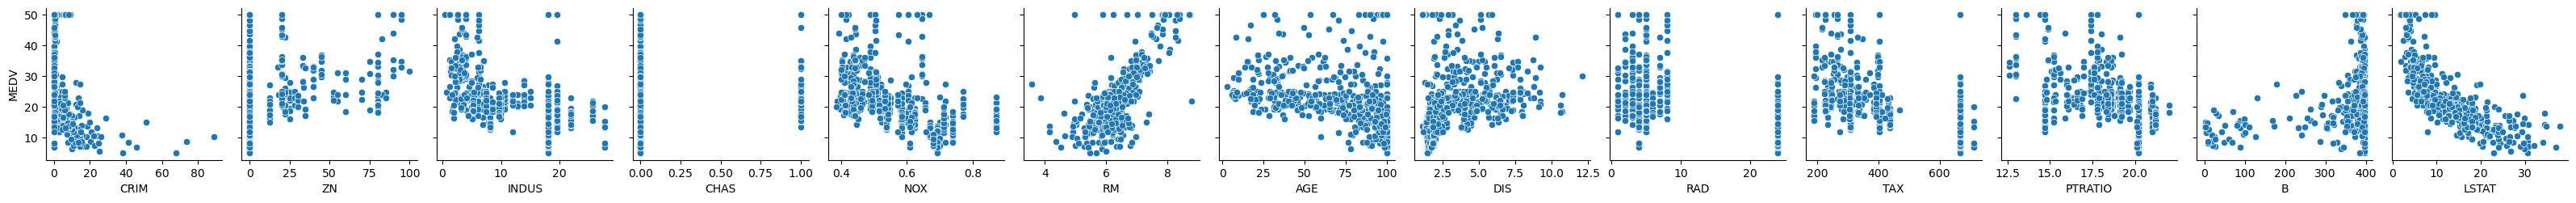

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=boston, y_vars=[ 'MEDV'], x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
plt.show()
correlations = boston.corr()['MEDV'].drop('MEDV')
print(correlations) 


18. Que peut-on conclure ? Expliquez

En examinant les coefficients de corrélation et les graphiques de dispersion, nous pouvons conclure que certaines variables ont une relation linéaire plus forte avec medv que d'autres. Cela peut aider à sélectionner les variables les plus significatives pour le modèle final.

19. Reconstruire le modèle linéaire avec toutes les variables sauf celles non significatives.

In [67]:

selected_cols = ['RM', 'LSTAT', 'PTRATIO']
X_sig= train_boston[selected_cols]
y_sig = train_boston.MEDV
model_sig = LinearRegression().fit(X_sig, y_sig)

y_pred2 = model_sig.predict(X_sig)

print("Coefficients: ", model_sig.coef_)
print("Intercept: ", model_sig.intercept_)


Coefficients:  [ 5.81366649 -0.47570216 -0.68973064]
Intercept:  5.267935508987076


20. Que peut-on conclure ? Expliquez 

En examinant les coefficients de régression dans le modèle linéaire multiple, on peut conclure que lstat est la variable indépendante la plus importante pour prédire medv, suivie de rm et ptratio. D'autres variables ont une influence plus faible sur medv, telles que dis et black. Il est important de noter que le modèle linéaire multiple suppose une relation linéaire entre les variables, ce qui peut ne pas être le cas dans la réalité

21. Construire le modèle linéaire avec la variable medv et l’interaction entre lstat et age.

In [94]:

X_train = train_boston["AGE"][:, np.newaxis] * train_boston["LSTAT"][:, np.newaxis]
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
model.score(X_train, y_train)


Coefficients:  [-0.00742493]
Intercept:  30.513585150704436


/tmp/ipykernel_34195/3397427145.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = train_boston["AGE"][:, np.newaxis] * train_boston["LSTAT"][:, np.newaxis]


0.37297909285324726

22. Vérifier si le modèle est non linéaire de degré 2, 3, 4, 5, 6 et 7.

In [91]:
from sklearn.linear_model import LinearRegression

X_train_new = np.column_stack([
    train_boston.LSTAT, train_boston.AGE,
    train_boston.LSTAT ** 2, train_boston.AGE ** 2,
    train_boston.LSTAT ** 3, train_boston.AGE ** 3,
    train_boston.LSTAT ** 4, train_boston.AGE ** 4,
    train_boston.LSTAT ** 5, train_boston.AGE ** 5,
    train_boston.LSTAT ** 6, train_boston.AGE ** 6,
    train_boston.LSTAT ** 7, train_boston.AGE ** 7,
])

for i in range(2, 8):
    model = LinearRegression()
    X_train_new_i = X_train_new[:, :2*i]
    model.fit(X_train_new_i, y_train)
    print(f"Modèle de degré {i}, R² = {model.score(X_train_new_i, y_train):.3f}")


Modèle de degré 2, R² = 0.649
Modèle de degré 3, R² = 0.670
Modèle de degré 4, R² = 0.680
Modèle de degré 5, R² = 0.682
Modèle de degré 6, R² = 0.684
Modèle de degré 7, R² = 0.684


23. Que peut-on conclure. 
 

 la relation entre les variables n'est pas linéaire et qu'un modèle non linéaire pourrait mieux expliquer les données. Cependant, il est également possible que le modèle linéaire soit suffisant pour expliquer les données et que l'ajout de termes non linéaires n'améliore pas significativement la performance du modèle.